--- Step 1: Data Loaded and Cleaned Successfully ---

--- Step 2: Preprocessing Complete ---

--- Step 3: Data Split Complete ---

--- Step 4: Model Training Complete ---

--- Step 5: Model Evaluation ---
Model Accuracy: 0.7792

Classification Report:
                precision    recall  f1-score   support

   Default (0)       0.92      0.41      0.56        54
No Default (1)       0.75      0.98      0.85       100

      accuracy                           0.78       154
     macro avg       0.84      0.69      0.71       154
  weighted avg       0.81      0.78      0.75       154


Confusion matrix saved as 'confusion_matrix.png'
Decision tree saved as 'decision_tree.png'

--- Analysis Complete ---


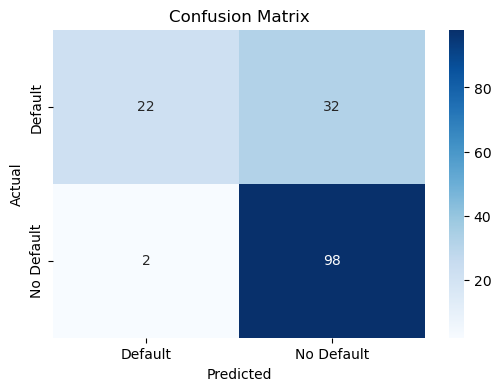

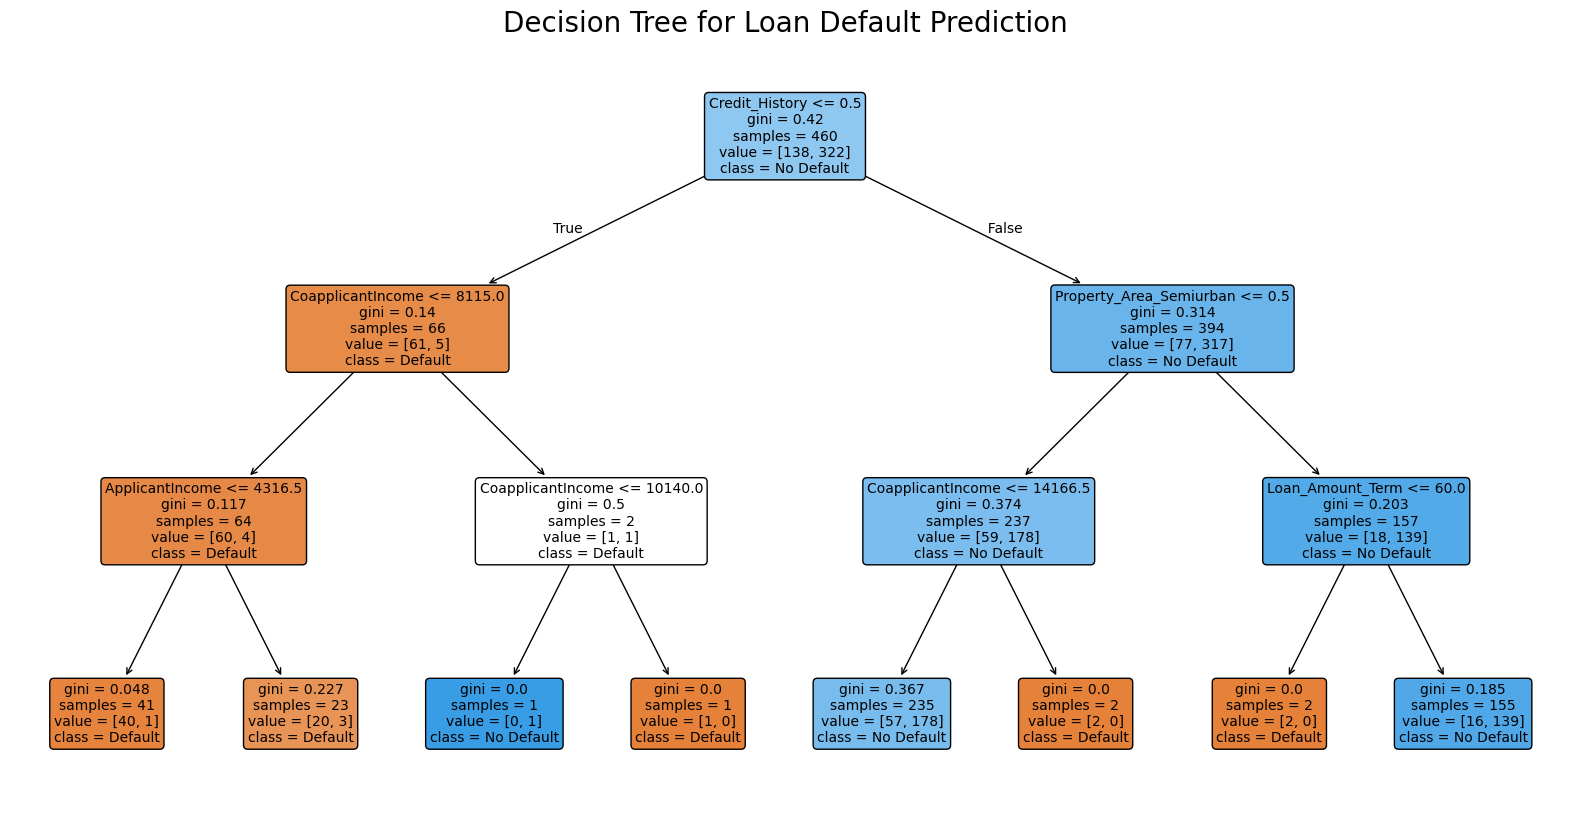

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Load Your Local Data ---
    df = pd.read_csv('loan_data_set.csv')
    
    # --- FIX: Clean column names to prevent KeyErrors ---
    # This removes any leading/trailing spaces from all column names.
    df.columns = df.columns.str.strip()
    
    print("--- Step 1: Data Loaded and Cleaned Successfully ---\n")

    # --- Step 2: Preprocess the Data ---
    # Handle Missing Values (with updated syntax to avoid warnings)
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
    df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
    df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
    df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
    df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

    # Encode Categorical Features
    df = df.drop('Loan_ID', axis=1)
    le = LabelEncoder()
    # This part should now work without the KeyError
    for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
        df[col] = le.fit_transform(df[col])
    
    df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)
    print("--- Step 2: Preprocessing Complete ---\n")


    # --- Step 3: Split the Data ---
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    print("--- Step 3: Data Split Complete ---\n")


    # --- Step 4: Train the Decision Tree Model ---
    dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt_model.fit(X_train, y_train)
    print("--- Step 4: Model Training Complete ---\n")


    # --- Step 5: Evaluate the Model ---
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("--- Step 5: Model Evaluation ---")
    print(f"Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Default (0)', 'No Default (1)']))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Default', 'No Default'], yticklabels=['Default', 'No Default'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    print("\nConfusion matrix saved as 'confusion_matrix.png'")


    # --- Step 6: Visualize the Decision Tree ---
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model,
              feature_names=X.columns,
              class_names=['Default', 'No Default'],
              filled=True,
              rounded=True,
              fontsize=10)
    plt.title("Decision Tree for Loan Default Prediction", fontsize=20)
    plt.savefig('decision_tree.png')
    print("Decision tree saved as 'decision_tree.png'")
    print("\n--- Analysis Complete ---")

except FileNotFoundError:
    print("Error: 'loan_data_set.csv' not found. Please ensure the file is in the same folder as this script.")
except KeyError as e:
    print(f"A KeyError occurred: {e}. This means a column name in the code does not match the CSV file.")
    print("Please check your CSV file for the exact column names.")